<Figure size 432x288 with 0 Axes>

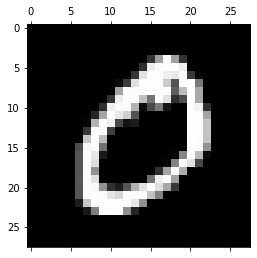

0


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import tensorflowjs as tfjs

(x_train_init, y_train_init), (x_test_init, y_test_init) = tf.keras.datasets.mnist.load_data()
plt.gray() 
plt.matshow(x_train_init[1]) 
plt.show()
print(y_train_init[1])

In [2]:
# one-hot encoding of labels
y_train, y_test = tf.keras.utils.to_categorical(y_train_init), tf.keras.utils.to_categorical(y_test_init)
# normalise pixel values
x_train, x_test = x_train_init/255.0, x_test_init/225.0

# reshape to be displayed by only 1 colour - grey scale
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


In [3]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(28*28,activation="relu"))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=10)
model.summary()

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2595 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1114 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0822 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0558 - accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0476 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0317 - accuracy: 0.9891
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [4]:
#tfjs.converters.save_keras_model(model,"C:/Users/10jas/Desktop/369")
#config = model.to_json()
tfjs.converters.save_keras_model(model,"tfjsmodel")
model.evaluate(x_test,y_test,verbose=2)

C:\Users\10jas\AppData\Roaming\Python\Python38\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


313/313 - 1s - loss: 0.0496 - accuracy: 0.9876


[0.049613457173109055, 0.9876000285148621]